# 환경설치

In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 필요한 라이브러리 설치 (코랩에서 실행)
!pip install torch torchvision matplotlib seaborn pandas numpy Pillow scikit-learn

# 기본 라이브러리 import
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time
import os

import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 시드 설정 (재현 가능한 결과를 위해)
torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch 버전: {torch.__version__}")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

어휘사전 크기: 44, 예시 vocab: [('<PAD>', 0), ('<UNK>', 1), ('정말', 2), ('재미있고', 3), ('감동적인', 4), ('영화였어요', 5), ('스토리가', 6), ('지루하고', 7), ('별로였어요', 8), ('연기가', 9)]
Epoch 2/15 - Loss: 0.6032 - Acc: 0.62
Epoch 5/15 - Loss: 0.7097 - Acc: 0.62
Epoch 10/15 - Loss: 0.6222 - Acc: 0.62
Epoch 15/15 - Loss: 0.5038 - Acc: 0.62


/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/c

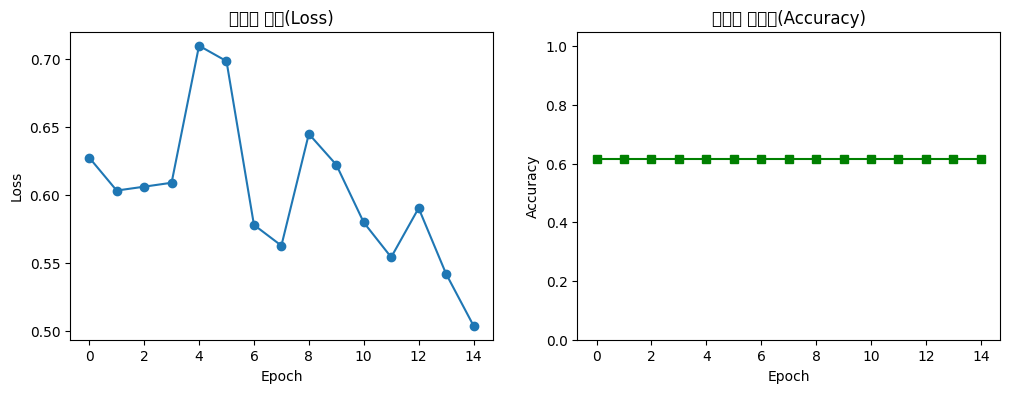


최종 정확도: 0.62


/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPytho

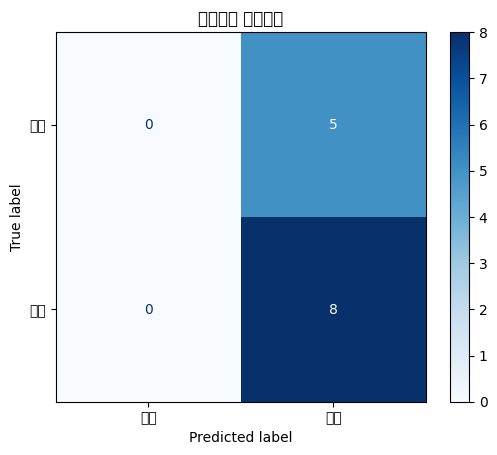


예측 결과 예시:
  원문: 정말 재미있고 감동적인 영화였어요
  예측: 부정  (정답: 긍정)

  원문: 스토리가 지루하고 별로였어요
  예측: 부정  (정답: 부정)

  원문: 연기가 자연스럽고 몰입됐어요
  예측: 부정  (정답: 긍정)

  원문: 시간이 아깝고 재미없었어요
  예측: 부정  (정답: 부정)

  원문: 최고의 작품 강추합니다
  예측: 부정  (정답: 긍정)

  원문: 실망스럽고 후회되는 영화
  예측: 부정  (정답: 부정)

  원문: 음악과 영상미가 뛰어났어요
  예측: 부정  (정답: 긍정)

  원문: 음악이 별루에요
  예측: 부정  (정답: 부정)

  원문: 배우가 연기를 못해요
  예측: 부정  (정답: 부정)

  원문: 내용이 뻔하고 실망이었어요
  예측: 부정  (정답: 부정)

  원문: 음악이 배경하고 잘 어울렸었어요
  예측: 부정  (정답: 긍정)

  원문: 사람이 너무 많아서 몰입이 안되었어요
  예측: 부정  (정답: 부정)

  원문: 돌비 사운드가 너무 안 좋아서 별루에요
  예측: 부정  (정답: 부정)



In [1]:
# --- PyTorch 한글 리뷰 감성분석 전체 파이프라인 ---
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. 예시 한글 리뷰 & 라벨 (긍정:1, 부정:0)
reviews = [
    "정말 재미있고 감동적인 영화였어요",
    "스토리가 지루하고 별로였어요",
    "연기가 자연스럽고 몰입됐어요",
    "시간이 아깝고 재미없었어요",
    "최고의 작품 강추합니다",
    "실망스럽고 후회되는 영화",
    "음악과 영상미가 뛰어났어요",
    "음악이 별루에요",
    "배우가 연기를 못해요",
    "내용이 뻔하고 실망이었어요",
    "음악이 배경하고 잘 어울렸었어요",
    "사람이 너무 많아서 몰입이 안되었어요",
    "돌비 사운드가 너무 안 좋아서 별루에요"
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 0 ,0,1,0,0]

# 2. 어휘사전 구축
def build_vocab(sentences, min_freq=1):
    vocab = {'<PAD>':0, '<UNK>':1}
    word_freq = {}
    for sent in sentences:
        for word in sent.split():
            word_freq[word] = word_freq.get(word,0)+1
    for word, freq in word_freq.items():
        if freq >= min_freq and word not in vocab:
            vocab[word] = len(vocab)
    return vocab

vocab = build_vocab(reviews)
vocab_size = len(vocab)
print(f"어휘사전 크기: {vocab_size}, 예시 vocab: {list(vocab.items())[:10]}")

# 3. 숫자 시퀀스 변환 (패딩)
def text_to_sequence(text, vocab, max_length=10):
    seq = []
    for word in text.split():
        seq.append(vocab.get(word, vocab['<UNK>']))
    # 패딩 또는 자르기
    if len(seq) < max_length:
        seq += [vocab['<PAD>']] * (max_length - len(seq))
    else:
        seq = seq[:max_length]
    return seq

max_length = 10

# 4. Dataset 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, labels, vocab, max_length):
        self.sequences = [text_to_sequence(r, vocab, max_length) for r in reviews]
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = ReviewDataset(reviews, labels, vocab, max_length)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# 5. 모델 정의 (임베딩+평균+선형)
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=16):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.fc = nn.Linear(embed_dim, 2)
    def forward(self, x):
        emb = self.embedding(x)         # (batch, seq, embed_dim)
        emb_mean = emb.mean(dim=1)      # (batch, embed_dim)
        out = self.fc(emb_mean)         # (batch, 2)
        return out

model = SentimentModel(vocab_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.006)

# 6. 학습 (에폭별 손실/정확도 기록)
epochs = 15
loss_list = []
acc_list = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for x_batch, y_batch in loader:
        preds = model(x_batch)
        loss = criterion(preds, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        pred_label = torch.argmax(preds, dim=1)
        correct += (pred_label == y_batch).sum().item()
        total += y_batch.size(0)
    loss_list.append(epoch_loss/len(loader))
    acc_list.append(correct/total)
    if (epoch+1)%5 == 0 or epoch==1:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss/len(loader):.4f} - Acc: {correct/total:.2f}")

# 7. 학습 곡선 그래프
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_list, marker='o')
plt.title('에폭별 손실(Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(acc_list, marker='s', color='green')
plt.title('에폭별 정확도(Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.show()

# 8. 평가 및 혼동행렬
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for x_batch, y_batch in loader:
        out = model(x_batch)
        pred = torch.argmax(out, dim=1)
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
    acc = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"\n최종 정확도: {acc:.2f}")

cm = confusion_matrix(all_labels, all_preds, labels=[1,0])
disp = ConfusionMatrixDisplay(cm, display_labels=['긍정','부정'])
disp.plot(cmap='Blues')
plt.title("감성분석 혼동행렬")
plt.show()

# 9. 예측 결과 예시
def decode_sequence(seq, vocab):
    idx2word = {v:k for k,v in vocab.items()}
    return ' '.join([idx2word.get(idx, '<UNK>') for idx in seq if idx2word.get(idx, '<UNK>') != '<PAD>'])

print("\n예측 결과 예시:")
for i in range(len(reviews)):
    x = torch.tensor([dataset.sequences[i]])
    out = model(x)
    pred = torch.argmax(out, dim=1).item()
    print(f"  원문: {reviews[i]}")
    print(f"  예측: {'긍정' if pred==1 else '부정'}  (정답: {'긍정' if labels[i]==1 else '부정'})\n")
